Import the Required Libraries

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Declare the Data as per the Question

In [2]:
n = 100
t=np.linspace(1,101,100)
e = np.array([5*np.sin(i*3*np.pi/(n))+np.sin(i*10*np.pi/(n)) for i in t])
Der = [0.08,0.025,0.005]
d=np.arange(1,101,1)

e=np.reshape(e,(n,1))
d=np.reshape(d,(n,1))



Defining the total cost function

In [20]:
def cost_function(u):
  phifill=np.array([2*(cp.maximum(x,0))**2 + 30*cp.maximum(x,0) for x in u])
  phicut=np.array([12*(cp.maximum(-x,0))**2 + cp.maximum(-x,0) for x in u])
  cost = phifill+phicut
  return cost

In [4]:
#Variable that need to br optimized
h = cp.Variable((n,1))
u = h-e

Adding constraints

In [11]:
constraints = []
#Derivatives
D1 = np.zeros((n,1))
D2 = np.zeros((n,1))
D3 = np.zeros((n,1))



D1=h[1:(h.shape[0])-1]-h[0:(h.shape[0])-2]
D2=D1[1:(D1.shape[0])-1]-D1[0:(D1.shape[0])-2]
D3=D2[1:(D2.shape[0])-1]-D2[0:(D2.shape[0])-2]
constraints=[cp.max(cp.abs(D1))<=Der[0],cp.max(cp.abs(D2))<=Der[1],cp.max(cp.abs(D3))<=Der[2]]

cost=cost_function(u)
cost_shape=cost.shape[0]
obj=cp.Minimize(cp.norm2(sum(cost)))



Solving for optimal solution

In [14]:
cost=cost_function(u)
cost_shape=cost.shape[0]
obj=cp.Minimize(cp.norm2(sum(cost)))

prob=cp.Problem(obj,constraints)

print("minimized cost:",prob.solve())
print("height values",h.value)

minimized cost: 7520.5701541509015
height values [[ 2.48763058]
 [ 2.56763054]
 [ 2.64763054]
 [ 2.72763058]
 [ 2.80563058]
 [ 2.87663045]
 [ 2.93563011]
 [ 2.97762946]
 [ 2.99762843]
 [ 2.99262748]
 [ 2.96262662]
 [ 2.91262586]
 [ 2.84762527]
 [ 2.77262493]
 [ 2.6926249 ]
 [ 2.61262488]
 [ 2.53262485]
 [ 2.45262483]
 [ 2.3726248 ]
 [ 2.29262477]
 [ 2.21262474]
 [ 2.13262471]
 [ 2.05262468]
 [ 1.97262465]
 [ 1.89262462]
 [ 1.81262459]
 [ 1.73262456]
 [ 1.65262453]
 [ 1.5726245 ]
 [ 1.49262447]
 [ 1.41262444]
 [ 1.33262441]
 [ 1.25262438]
 [ 1.17262435]
 [ 1.09262432]
 [ 1.0126243 ]
 [ 0.93262427]
 [ 0.85262424]
 [ 0.77262421]
 [ 0.69262419]
 [ 0.61262416]
 [ 0.53262413]
 [ 0.45262411]
 [ 0.37262409]
 [ 0.29262407]
 [ 0.2146691 ]
 [ 0.14375926]
 [ 0.0848946 ]
 [ 0.04307517]
 [ 0.02330101]
 [ 0.02852676]
 [ 0.05870798]
 [ 0.10884431]
 [ 0.17393542]
 [ 0.24898112]
 [ 0.3289813 ]
 [ 0.40898127]
 [ 0.48898131]
 [ 0.56898136]
 [ 0.6489814 ]
 [ 0.72898144]
 [ 0.80898148]
 [ 0.88898153]
 [ 0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Text(0.5, 1.0, 'Cut Cost vs Total Cost')

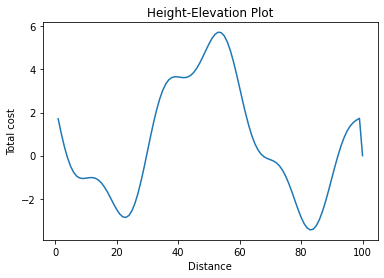

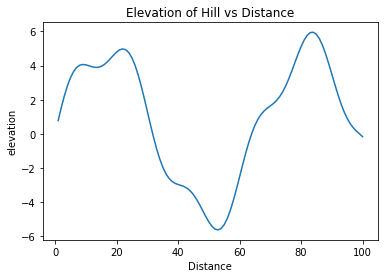

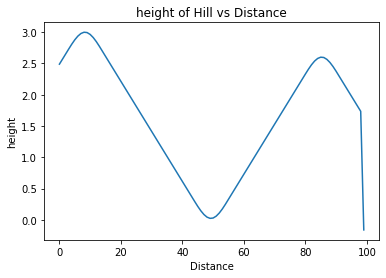

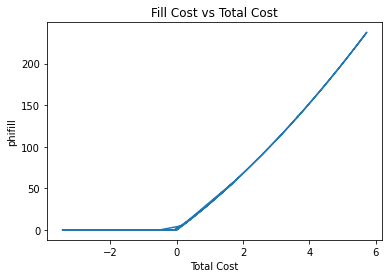

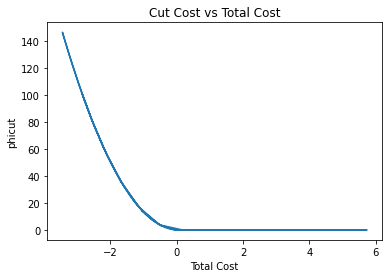

In [25]:
phifill=np.array([2*(max(x,0))**2 + 30*max(x,0) for x in u.value])
phicut=np.array([12*(max(-x,0))**2 + max(-x,0) for x in u.value])

plt.figure()
plt.plot(d,u.value)
plt.xlabel("Distance")
plt.ylabel("Total cost")
plt.title("Height-Elevation Plot")

plt.figure()
plt.plot(d,e)
plt.xlabel("Distance")
plt.ylabel("elevation")
plt.title("Elevation of Hill vs Distance")

plt.figure()
plt.plot(h.value)
plt.xlabel("Distance")
plt.ylabel("height")
plt.title("height of Hill vs Distance")


plt.figure()
plt.plot(u.value,phifill)
plt.xlabel("Total Cost")
plt.ylabel("phifill")
plt.title("Fill Cost vs Total Cost")

plt.figure()
plt.plot(u.value,phicut)
plt.xlabel("Total Cost")
plt.ylabel("phicut")
plt.title("Cut Cost vs Total Cost")

